## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  68.919546  1719.358678  0.825868   3.191876  1.538743
1  26.845809  1544.247990  0.253704  10.187851  1.520293
2  86.591766   857.431341  0.941416   3.917167  1.714006
3  65.577368  1699.211967  0.963619   9.563569  1.600576
4  88.037763  1455.372669  0.621811   8.714854  1.361470


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 1.0263525	total: 51.9ms	remaining: 51.8s
1:	learn: 1.0156057	total: 52.4ms	remaining: 26.2s
2:	learn: 1.0061839	total: 53ms	remaining: 17.6s
3:	learn: 0.9962076	total: 54.7ms	remaining: 13.6s
4:	learn: 0.9879916	total: 55.4ms	remaining: 11s
5:	learn: 0.9797103	total: 56ms	remaining: 9.27s
6:	learn: 0.9680028	total: 56.7ms	remaining: 8.04s
7:	learn: 0.9595760	total: 57.3ms	remaining: 7.11s
8:	learn: 0.9526471	total: 58ms	remaining: 6.38s
9:	learn: 0.9449852	total: 58.6ms	remaining: 5.8s
10:	learn: 0.9366797	total: 59.3ms	remaining: 5.33s
11:	learn: 0.9253224	total: 60ms	remaining: 4.94s
12:	learn: 0.9169452	total: 60.8ms	remaining: 4.61s
13:	learn: 0.9092040	total: 61.4ms	remaining: 4.32s
14:	learn: 0.8995699	total: 62.1ms	remaining: 4.08s
15:	learn: 0.8921314	total: 62.8ms	remaining: 3.87s
16:	learn: 0.8840676	total: 63.4ms	remaining: 3.67s
17:	learn: 0.8758136	total: 64ms	remaining: 3.49s
18:	learn: 0.8702140	total: 64.6ms	remaining: 3.33s
19:	l

99:	learn: 0.4578794	total: 114ms	remaining: 1.02s
100:	learn: 0.4553712	total: 114ms	remaining: 1.02s
101:	learn: 0.4524384	total: 115ms	remaining: 1.01s
102:	learn: 0.4498189	total: 117ms	remaining: 1.02s
103:	learn: 0.4472187	total: 118ms	remaining: 1.01s
104:	learn: 0.4437656	total: 118ms	remaining: 1.01s
105:	learn: 0.4412711	total: 119ms	remaining: 1s
106:	learn: 0.4387677	total: 119ms	remaining: 995ms
107:	learn: 0.4355590	total: 120ms	remaining: 990ms
108:	learn: 0.4325855	total: 120ms	remaining: 984ms
109:	learn: 0.4295299	total: 121ms	remaining: 977ms
110:	learn: 0.4263436	total: 122ms	remaining: 977ms
111:	learn: 0.4237366	total: 124ms	remaining: 984ms
112:	learn: 0.4207756	total: 125ms	remaining: 978ms
113:	learn: 0.4182397	total: 125ms	remaining: 972ms
114:	learn: 0.4156921	total: 125ms	remaining: 966ms
115:	learn: 0.4130387	total: 126ms	remaining: 960ms
116:	learn: 0.4102363	total: 127ms	remaining: 956ms
117:	learn: 0.4082024	total: 127ms	remaining: 950ms
118:	learn: 0.40

170:	learn: 0.3056383	total: 190ms	remaining: 922ms
171:	learn: 0.3038801	total: 191ms	remaining: 918ms
172:	learn: 0.3020127	total: 191ms	remaining: 914ms
173:	learn: 0.3003986	total: 192ms	remaining: 910ms
174:	learn: 0.2989617	total: 199ms	remaining: 939ms
175:	learn: 0.2976414	total: 200ms	remaining: 935ms
176:	learn: 0.2960052	total: 200ms	remaining: 931ms
177:	learn: 0.2948760	total: 203ms	remaining: 936ms
178:	learn: 0.2937194	total: 203ms	remaining: 933ms
179:	learn: 0.2923138	total: 205ms	remaining: 935ms
180:	learn: 0.2909556	total: 206ms	remaining: 932ms
181:	learn: 0.2891362	total: 207ms	remaining: 929ms
182:	learn: 0.2877595	total: 207ms	remaining: 924ms
183:	learn: 0.2861895	total: 208ms	remaining: 920ms
184:	learn: 0.2854954	total: 208ms	remaining: 916ms
185:	learn: 0.2841037	total: 208ms	remaining: 912ms
186:	learn: 0.2826751	total: 212ms	remaining: 922ms
187:	learn: 0.2813419	total: 220ms	remaining: 951ms
188:	learn: 0.2797206	total: 221ms	remaining: 947ms
189:	learn: 

245:	learn: 0.2204247	total: 274ms	remaining: 841ms
246:	learn: 0.2198238	total: 275ms	remaining: 838ms
247:	learn: 0.2191246	total: 276ms	remaining: 835ms
248:	learn: 0.2185326	total: 276ms	remaining: 833ms
249:	learn: 0.2178308	total: 278ms	remaining: 833ms
250:	learn: 0.2172337	total: 278ms	remaining: 830ms
251:	learn: 0.2166755	total: 279ms	remaining: 827ms
252:	learn: 0.2157245	total: 279ms	remaining: 824ms
253:	learn: 0.2150971	total: 279ms	remaining: 821ms
254:	learn: 0.2144746	total: 290ms	remaining: 848ms
255:	learn: 0.2139207	total: 291ms	remaining: 845ms
256:	learn: 0.2131903	total: 292ms	remaining: 844ms
257:	learn: 0.2126722	total: 293ms	remaining: 843ms
258:	learn: 0.2120105	total: 293ms	remaining: 839ms
259:	learn: 0.2113621	total: 294ms	remaining: 836ms
260:	learn: 0.2103953	total: 295ms	remaining: 834ms
261:	learn: 0.2099271	total: 295ms	remaining: 832ms
262:	learn: 0.2092300	total: 296ms	remaining: 829ms
263:	learn: 0.2087208	total: 296ms	remaining: 826ms
264:	learn: 

307:	learn: 0.1812106	total: 394ms	remaining: 885ms
308:	learn: 0.1802839	total: 394ms	remaining: 882ms
309:	learn: 0.1796343	total: 395ms	remaining: 879ms
310:	learn: 0.1790729	total: 396ms	remaining: 877ms
311:	learn: 0.1786061	total: 396ms	remaining: 874ms
312:	learn: 0.1773613	total: 397ms	remaining: 872ms
313:	learn: 0.1767923	total: 398ms	remaining: 870ms
314:	learn: 0.1758723	total: 399ms	remaining: 868ms
315:	learn: 0.1755515	total: 400ms	remaining: 866ms
316:	learn: 0.1752689	total: 400ms	remaining: 863ms
317:	learn: 0.1749166	total: 401ms	remaining: 860ms
318:	learn: 0.1737281	total: 401ms	remaining: 857ms
319:	learn: 0.1732339	total: 402ms	remaining: 854ms
320:	learn: 0.1726411	total: 402ms	remaining: 851ms
321:	learn: 0.1714553	total: 403ms	remaining: 848ms
322:	learn: 0.1711095	total: 403ms	remaining: 845ms
323:	learn: 0.1703991	total: 404ms	remaining: 842ms
324:	learn: 0.1692738	total: 405ms	remaining: 841ms
325:	learn: 0.1689388	total: 406ms	remaining: 839ms
326:	learn: 

422:	learn: 0.1146261	total: 459ms	remaining: 627ms
423:	learn: 0.1143232	total: 460ms	remaining: 625ms
424:	learn: 0.1138465	total: 460ms	remaining: 623ms
425:	learn: 0.1133384	total: 461ms	remaining: 622ms
426:	learn: 0.1128418	total: 462ms	remaining: 620ms
427:	learn: 0.1125465	total: 463ms	remaining: 618ms
428:	learn: 0.1122572	total: 463ms	remaining: 616ms
429:	learn: 0.1117979	total: 464ms	remaining: 615ms
430:	learn: 0.1112640	total: 464ms	remaining: 613ms
431:	learn: 0.1108140	total: 465ms	remaining: 611ms
432:	learn: 0.1103385	total: 465ms	remaining: 609ms
433:	learn: 0.1100585	total: 466ms	remaining: 607ms
434:	learn: 0.1095780	total: 466ms	remaining: 605ms
435:	learn: 0.1091410	total: 466ms	remaining: 603ms
436:	learn: 0.1086711	total: 467ms	remaining: 602ms
437:	learn: 0.1082593	total: 468ms	remaining: 600ms
438:	learn: 0.1079846	total: 468ms	remaining: 598ms
439:	learn: 0.1075621	total: 469ms	remaining: 597ms
440:	learn: 0.1071081	total: 469ms	remaining: 595ms
441:	learn: 

450:	learn: 0.1037077	total: 528ms	remaining: 642ms
451:	learn: 0.1032451	total: 528ms	remaining: 640ms
452:	learn: 0.1031264	total: 529ms	remaining: 638ms
453:	learn: 0.1030099	total: 529ms	remaining: 636ms
454:	learn: 0.1026302	total: 538ms	remaining: 644ms
455:	learn: 0.1022438	total: 539ms	remaining: 643ms
456:	learn: 0.1017653	total: 539ms	remaining: 641ms
457:	learn: 0.1014413	total: 541ms	remaining: 640ms
458:	learn: 0.1010013	total: 541ms	remaining: 638ms
459:	learn: 0.1008889	total: 543ms	remaining: 637ms
460:	learn: 0.1007785	total: 543ms	remaining: 635ms
461:	learn: 0.1003732	total: 544ms	remaining: 634ms
462:	learn: 0.1000003	total: 545ms	remaining: 632ms
463:	learn: 0.0996412	total: 546ms	remaining: 630ms
464:	learn: 0.0994748	total: 546ms	remaining: 628ms
465:	learn: 0.0991517	total: 547ms	remaining: 627ms
466:	learn: 0.0988022	total: 548ms	remaining: 626ms
467:	learn: 0.0984093	total: 550ms	remaining: 625ms
468:	learn: 0.0980482	total: 553ms	remaining: 626ms
469:	learn: 

499:	learn: 0.0886548	total: 614ms	remaining: 614ms
500:	learn: 0.0883345	total: 615ms	remaining: 612ms
501:	learn: 0.0880674	total: 617ms	remaining: 612ms
502:	learn: 0.0877559	total: 619ms	remaining: 612ms
503:	learn: 0.0874117	total: 620ms	remaining: 610ms
504:	learn: 0.0871050	total: 620ms	remaining: 608ms
505:	learn: 0.0869019	total: 621ms	remaining: 606ms
506:	learn: 0.0866065	total: 624ms	remaining: 607ms
507:	learn: 0.0863578	total: 625ms	remaining: 605ms
508:	learn: 0.0860660	total: 625ms	remaining: 603ms
509:	learn: 0.0858239	total: 627ms	remaining: 602ms
510:	learn: 0.0855539	total: 627ms	remaining: 600ms
511:	learn: 0.0852730	total: 628ms	remaining: 599ms
512:	learn: 0.0850415	total: 632ms	remaining: 600ms
513:	learn: 0.0848110	total: 634ms	remaining: 599ms
514:	learn: 0.0846162	total: 635ms	remaining: 598ms
515:	learn: 0.0843919	total: 636ms	remaining: 596ms
516:	learn: 0.0841598	total: 637ms	remaining: 596ms
517:	learn: 0.0839704	total: 640ms	remaining: 596ms
518:	learn: 

608:	learn: 0.0679802	total: 731ms	remaining: 469ms
609:	learn: 0.0678804	total: 732ms	remaining: 468ms
610:	learn: 0.0675667	total: 734ms	remaining: 468ms
611:	learn: 0.0674529	total: 736ms	remaining: 466ms
612:	learn: 0.0673549	total: 736ms	remaining: 465ms
613:	learn: 0.0672587	total: 737ms	remaining: 463ms
614:	learn: 0.0670056	total: 738ms	remaining: 462ms
615:	learn: 0.0668943	total: 738ms	remaining: 460ms
616:	learn: 0.0667996	total: 739ms	remaining: 459ms
617:	learn: 0.0667066	total: 740ms	remaining: 457ms
618:	learn: 0.0664272	total: 740ms	remaining: 456ms
619:	learn: 0.0663183	total: 741ms	remaining: 454ms
620:	learn: 0.0662088	total: 742ms	remaining: 453ms
621:	learn: 0.0661020	total: 744ms	remaining: 452ms
622:	learn: 0.0660112	total: 745ms	remaining: 451ms
623:	learn: 0.0659221	total: 745ms	remaining: 449ms
624:	learn: 0.0656505	total: 746ms	remaining: 448ms
625:	learn: 0.0655459	total: 750ms	remaining: 448ms
626:	learn: 0.0652263	total: 752ms	remaining: 447ms
627:	learn: 

678:	learn: 0.0576558	total: 854ms	remaining: 404ms
679:	learn: 0.0575300	total: 861ms	remaining: 405ms
680:	learn: 0.0574963	total: 862ms	remaining: 404ms
681:	learn: 0.0572196	total: 863ms	remaining: 402ms
682:	learn: 0.0571213	total: 863ms	remaining: 401ms
683:	learn: 0.0570879	total: 864ms	remaining: 399ms
684:	learn: 0.0568702	total: 864ms	remaining: 397ms
685:	learn: 0.0567747	total: 866ms	remaining: 397ms
686:	learn: 0.0565630	total: 867ms	remaining: 395ms
687:	learn: 0.0564701	total: 867ms	remaining: 393ms
688:	learn: 0.0563790	total: 868ms	remaining: 392ms
689:	learn: 0.0561738	total: 869ms	remaining: 391ms
690:	learn: 0.0560943	total: 870ms	remaining: 389ms
691:	learn: 0.0558365	total: 870ms	remaining: 387ms
692:	learn: 0.0557588	total: 873ms	remaining: 387ms
693:	learn: 0.0556720	total: 873ms	remaining: 385ms
694:	learn: 0.0554742	total: 874ms	remaining: 383ms
695:	learn: 0.0553984	total: 874ms	remaining: 382ms
696:	learn: 0.0553022	total: 875ms	remaining: 380ms
697:	learn: 

772:	learn: 0.0460958	total: 974ms	remaining: 286ms
773:	learn: 0.0459038	total: 976ms	remaining: 285ms
774:	learn: 0.0457272	total: 979ms	remaining: 284ms
775:	learn: 0.0456484	total: 979ms	remaining: 283ms
776:	learn: 0.0455910	total: 980ms	remaining: 281ms
777:	learn: 0.0455345	total: 980ms	remaining: 280ms
778:	learn: 0.0453918	total: 980ms	remaining: 278ms
779:	learn: 0.0452050	total: 981ms	remaining: 277ms
780:	learn: 0.0451621	total: 981ms	remaining: 275ms
781:	learn: 0.0450767	total: 982ms	remaining: 274ms
782:	learn: 0.0449057	total: 987ms	remaining: 274ms
783:	learn: 0.0447483	total: 988ms	remaining: 272ms
784:	learn: 0.0445908	total: 989ms	remaining: 271ms
785:	learn: 0.0445490	total: 991ms	remaining: 270ms
786:	learn: 0.0444612	total: 991ms	remaining: 268ms
787:	learn: 0.0442930	total: 992ms	remaining: 267ms
788:	learn: 0.0441577	total: 992ms	remaining: 265ms
789:	learn: 0.0441322	total: 995ms	remaining: 264ms
790:	learn: 0.0439677	total: 995ms	remaining: 263ms
791:	learn: 

826:	learn: 0.0406657	total: 1.03s	remaining: 215ms
827:	learn: 0.0405797	total: 1.03s	remaining: 214ms
828:	learn: 0.0405252	total: 1.03s	remaining: 213ms
829:	learn: 0.0403874	total: 1.03s	remaining: 212ms
830:	learn: 0.0402805	total: 1.03s	remaining: 210ms
831:	learn: 0.0401760	total: 1.03s	remaining: 209ms
832:	learn: 0.0401274	total: 1.04s	remaining: 208ms
833:	learn: 0.0400511	total: 1.04s	remaining: 206ms
834:	learn: 0.0400292	total: 1.04s	remaining: 205ms
835:	learn: 0.0399764	total: 1.04s	remaining: 204ms
836:	learn: 0.0399288	total: 1.04s	remaining: 203ms
837:	learn: 0.0398971	total: 1.04s	remaining: 202ms
838:	learn: 0.0398287	total: 1.04s	remaining: 200ms
839:	learn: 0.0396642	total: 1.04s	remaining: 199ms
840:	learn: 0.0396126	total: 1.05s	remaining: 198ms
841:	learn: 0.0395618	total: 1.05s	remaining: 196ms
842:	learn: 0.0395117	total: 1.05s	remaining: 195ms
843:	learn: 0.0394623	total: 1.05s	remaining: 194ms
844:	learn: 0.0392940	total: 1.05s	remaining: 193ms
845:	learn: 

891:	learn: 0.0358130	total: 1.16s	remaining: 140ms
892:	learn: 0.0356955	total: 1.16s	remaining: 139ms
893:	learn: 0.0356091	total: 1.16s	remaining: 138ms
894:	learn: 0.0355449	total: 1.16s	remaining: 136ms
895:	learn: 0.0354596	total: 1.16s	remaining: 135ms
896:	learn: 0.0353757	total: 1.17s	remaining: 134ms
897:	learn: 0.0353558	total: 1.17s	remaining: 133ms
898:	learn: 0.0353142	total: 1.17s	remaining: 131ms
899:	learn: 0.0351994	total: 1.17s	remaining: 130ms
900:	learn: 0.0350183	total: 1.17s	remaining: 129ms
901:	learn: 0.0348897	total: 1.17s	remaining: 127ms
902:	learn: 0.0347135	total: 1.17s	remaining: 126ms
903:	learn: 0.0346381	total: 1.17s	remaining: 125ms
904:	learn: 0.0345645	total: 1.18s	remaining: 123ms
905:	learn: 0.0345354	total: 1.18s	remaining: 122ms
906:	learn: 0.0344514	total: 1.18s	remaining: 121ms
907:	learn: 0.0344084	total: 1.18s	remaining: 120ms
908:	learn: 0.0343663	total: 1.19s	remaining: 119ms
909:	learn: 0.0343249	total: 1.19s	remaining: 117ms
910:	learn: 

961:	learn: 0.0311995	total: 1.27s	remaining: 50ms
962:	learn: 0.0311095	total: 1.27s	remaining: 48.7ms
963:	learn: 0.0310752	total: 1.27s	remaining: 47.4ms
964:	learn: 0.0309661	total: 1.27s	remaining: 46ms
965:	learn: 0.0309105	total: 1.27s	remaining: 44.7ms
966:	learn: 0.0308768	total: 1.27s	remaining: 43.4ms
967:	learn: 0.0307702	total: 1.27s	remaining: 42.1ms
968:	learn: 0.0307152	total: 1.28s	remaining: 40.9ms
969:	learn: 0.0305714	total: 1.28s	remaining: 39.5ms
970:	learn: 0.0304761	total: 1.28s	remaining: 38.2ms
971:	learn: 0.0303363	total: 1.28s	remaining: 37ms
972:	learn: 0.0302117	total: 1.28s	remaining: 35.7ms
973:	learn: 0.0300757	total: 1.29s	remaining: 34.3ms
974:	learn: 0.0299532	total: 1.29s	remaining: 33ms
975:	learn: 0.0299054	total: 1.29s	remaining: 31.7ms
976:	learn: 0.0297730	total: 1.29s	remaining: 30.3ms
977:	learn: 0.0296813	total: 1.29s	remaining: 29ms
978:	learn: 0.0295527	total: 1.29s	remaining: 27.7ms
979:	learn: 0.0294334	total: 1.29s	remaining: 26.4ms
980

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.3687299278578257


ABC Pre-generator MAE 0.43253122755141016


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

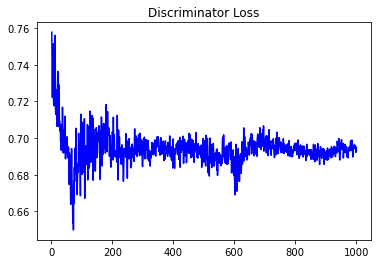

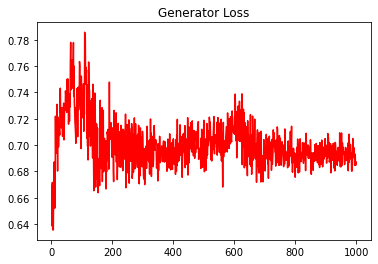

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.5682144753504544


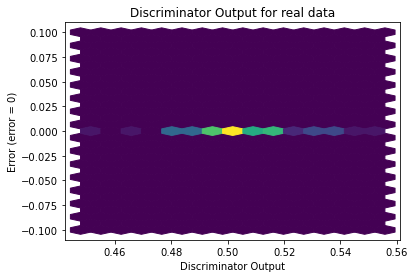

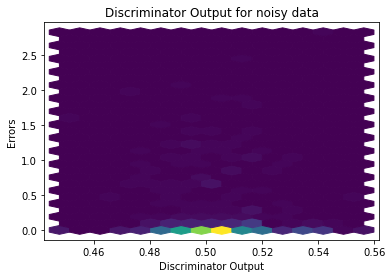

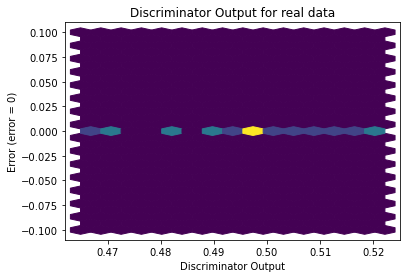

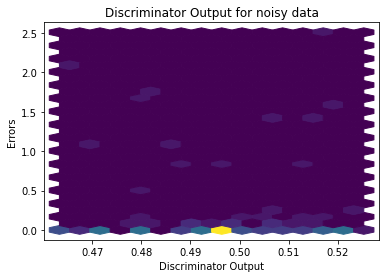

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

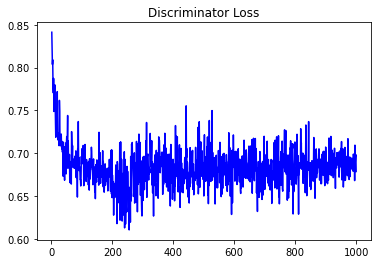

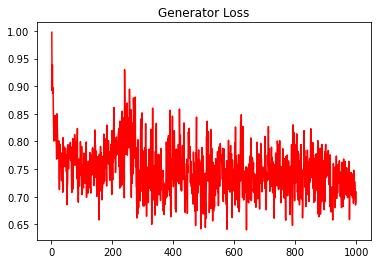

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
1.3205401658955962


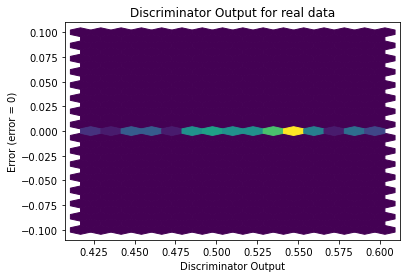

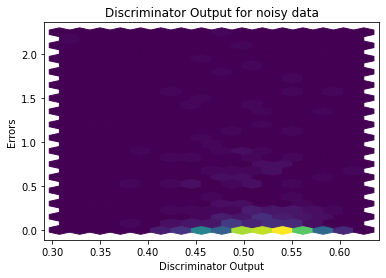

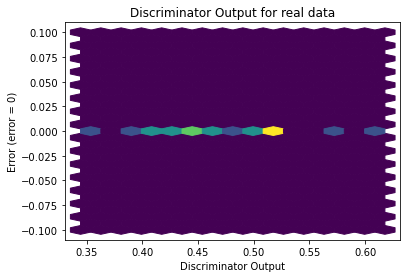

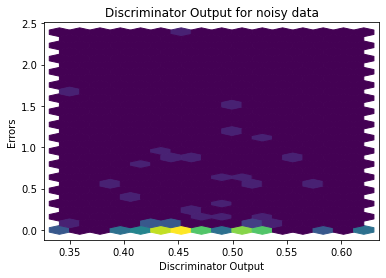

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


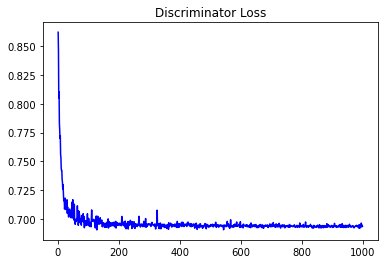

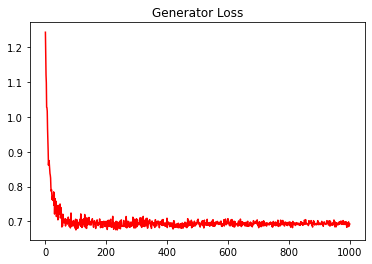

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.35550019211892503


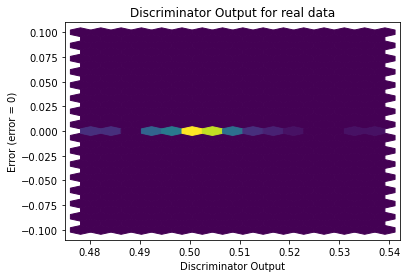

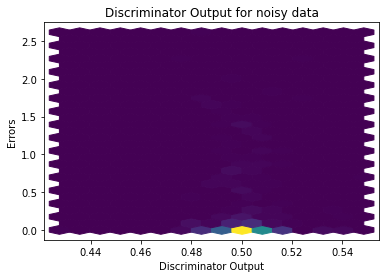

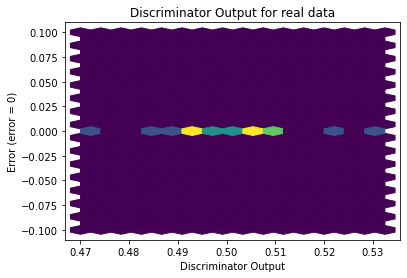

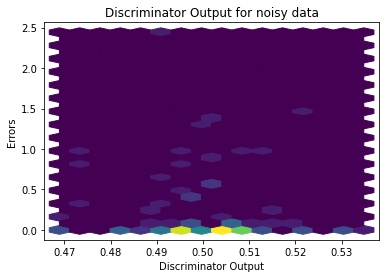

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


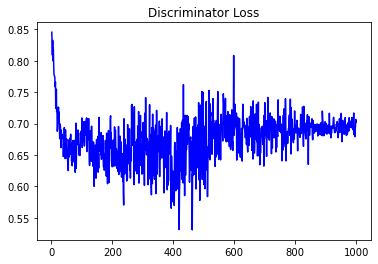

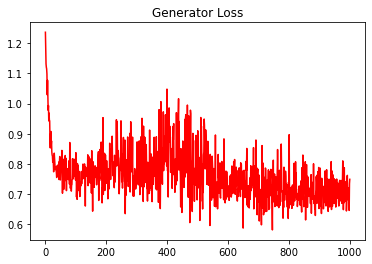

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.3504327601165278


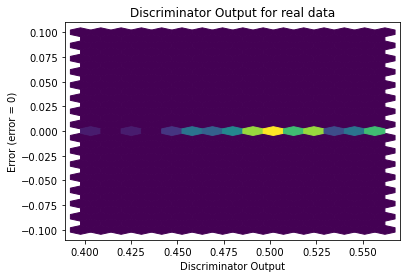

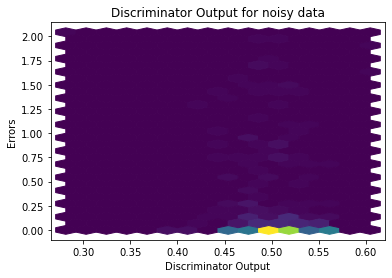

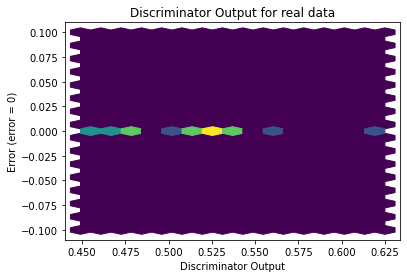

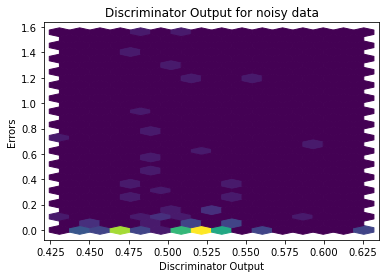

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5277]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1425]], requires_grad=True)
